# **Problem Statement:** Predicting Electric Vehicle Prices for EVision.

### **👔 Client Company:**
The company EVision operates through an innovative approach to produce affordable electric vehicles with superior performance for customers around the world. The EV market competition presents pricing approaches as essential factors for business success and market dominance. Evision uses data-driven insights to enhance pricing standards along with improving customer satisfaction and sales predictions for maintaining its market position.

### Why Does EVision Need a Data Scientist?
Evision functions in a rapidly changing market whose key variables consisting of battery evolution and efficiency standards and electrical infrastructure directly determine automobile pricing and consumer tastes. Competitor analysis and cost of manufacture no longer satisfies pricing needs. The company requires:

* The company needs precise market predictions for EV prices to establish competitive selling margins.
* The company needs data analysis to identify which product features have the most significant impact on price.
* The company needs to conduct market trend analysis to discover the elements behind electric vehicle price changes in the market.

### Business Problem & Importance
Evision requires a cost-effective pricing system which evaluates technical aspects as well as market elements. Incorrect pricing can lead to:

* Overpricing → Reduced sales due to unaffordability.
* Underpricing → Loss of potential profit.
* Misaligned pricing strategy → Poor competitiveness in the growing EV market.
* Standard specifications including battery capacity together with drive range measurements and recharging efficiency and speed will enable the prediction model to calculate exact electric vehicle pricing.


### **⬇️ Import Required Libraries**
Before start exploring the data, let's import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **🗂️ Data Exploration**
The next stage includes dataset loading which allows evaluation of missing data and distribution along with quality identification.

In [2]:
df = pd.read_csv('EV_DB.csv')
df_backup = df.copy() 
print(f'The data has {df.shape[0]} Electrical cars and {df.shape[1]} features')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'EV_DB.csv'

### **✍🏼 Dataset Overview**

The project is based on a database containing specifications and performance numbers and price details about electric vehicles.

### **Key Details:**
- **Dataset Source:** EV Database (2023)

* Battery Capacity (kWh)
* Range (km)
* Efficiency (Wh/km)
* Performance Metrics (Acceleration, Top speed)
* Drive Type (AWD, FWD, RWD)
* Fast Charging Speed (km/h)
* Number of Seats 
* Price in Germany (€) - Target value

**The machine learning model** will predict electric vehicle prices through an analysis of vehicle specifications that will use this dataset. Data cleaning procedures along with preprocessing operations become necessary for preparing the dataset before moving on to modeling.


### **🔍 Data Exploration**
First of all, we can start by checking how good is our database.

In [ ]:
#Checking missing values.
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"Missing Values:\n{missing_values}")


Missing Values:
PriceinGermany     27
PriceinUK         111
dtype: int64


In [ ]:
#Checking the data types
print("Data types:")
print(df.dtypes)

Data types:
Name               object
Subtitle           object
Acceleration       object
TopSpeed           object
Range              object
Efficiency         object
FastChargeSpeed    object
Drive              object
NumberofSeats       int64
PriceinGermany     object
PriceinUK          object
dtype: object


In [ ]:
#Checking unique values.
print("Unique Values in Each Column:\n")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()}")

Unique Values in Each Column:

Name: 308
Subtitle: 187
Acceleration: 84
TopSpeed: 36
Range: 80
Efficiency: 89
FastChargeSpeed: 91
Drive: 3
PriceinGermany: 250
PriceinUK: 185


### **🧹 Data Preprocessing**
Let's start with our preprocessing step.

* Our data has object columns and we have to convert them to numeric values. (For example: "2.7 sec" to "2.7")
* We have to extract battery capacity from the Subtitle and remove the subtitle.
* We have to handle with the missing values so that it does not affect our model.
* Let's also do one-hot encoding to the Drive column and convert them to integers. It will be better for us to train.
* We can remove the "Name" column because we dont need it in our model. It is basicly an identification.

*Later on I will check if everything is perfect before splitting our data.

In [ ]:
#Let's drop PriceinUK because we dont need it
df.drop(columns=['PriceinUK'], inplace=True)

#Converting numeric values
def extract_numerical_values(value):
    if isinstance(value, str):
        value = re.sub(r'[^0-9.]', '', value)
        return float(value) if value else np.nan
    return value

numeric_cols = ['Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'PriceinGermany']
for col in numeric_cols:
    df[col] = df[col].apply(extract_numerical_values)

# Extract battery capacity from Subtitle
df['BatteryCapacity'] = df['Subtitle'].str.extract(r'(\d+\.?\d*)').astype(float)

# Drop the Subtitle column
df.drop(columns=['Subtitle'], inplace=True)

# Drop rows where price is missing
df = df.dropna(subset=['PriceinGermany'])  

# One-hot encode Drive column
df = pd.get_dummies(df, columns=['Drive'])

# Convert one-hot encoded to integers
drive_columns = ['Drive_All Wheel Drive', 'Drive_Front Wheel Drive', 'Drive_Rear Wheel Drive']
df[drive_columns] = df[drive_columns].astype(int)

#At last, we can remove the name column because it is an identifier.
df.drop(columns=['Name'], inplace=True)

# Display the cleaned dataset
print("\nPreprocessed Data Sample:")
df.head()


Preprocessed Data Sample:


,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,PriceinGermany,BatteryCapacity,Drive_All Wheel Drive,Drive_Front Wheel Drive,Drive_Rear Wheel Drive
0,2.7,270.0,645.0,183.0,820.0,5,218000.0,118.0,1,0,0
1,2.8,260.0,400.0,209.0,980.0,4,189668.0,83.7,1,0,0
2,3.3,250.0,405.0,210.0,1000.0,4,146050.0,85.0,1,0,0
3,11.4,135.0,315.0,165.0,230.0,5,36840.0,52.0,0,1,0
5,3.7,250.0,415.0,181.0,640.0,5,63667.0,75.0,1,0,0


In [ ]:
# Check if there are any remaining missing values
print("Missing values after preprocessing step:\n")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  

Missing values after preprocessing step:

FastChargeSpeed    3
dtype: int64


In [ ]:
#Filling the missing values with median.
df['FastChargeSpeed'] = df['FastChargeSpeed'].fillna(df['FastChargeSpeed'].median())

* We can create a Correlation heatmap to understand the correlation between our features.

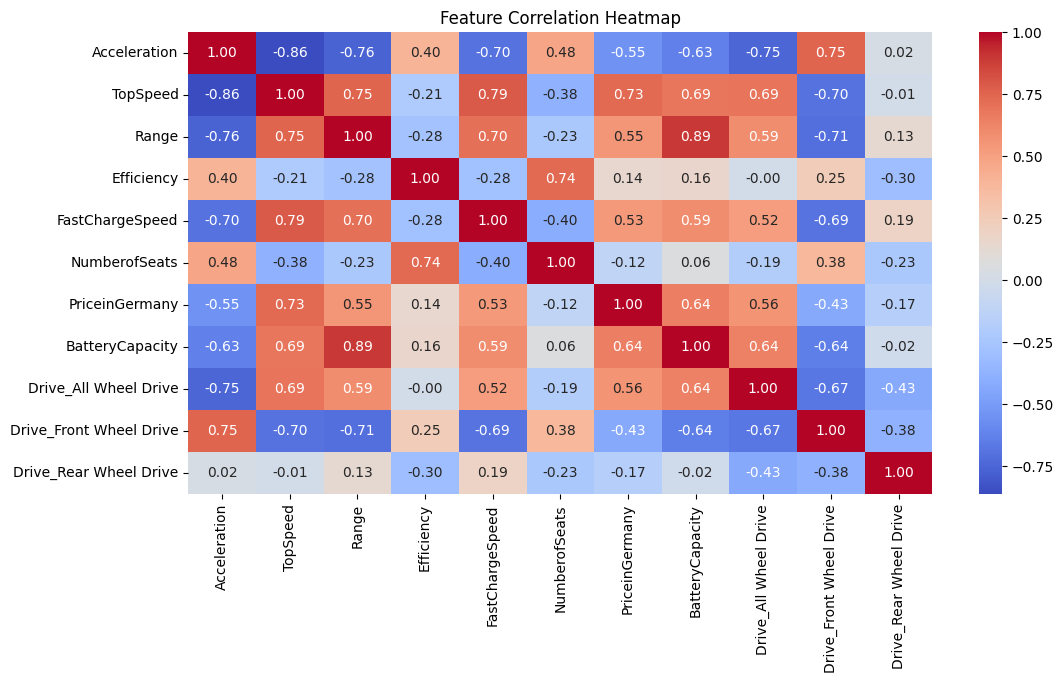

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##### **PriceinGermany (Target) Correlation:**

**Strong correlation with:**
- **TopSpeed (0.73)** The price of an electric vehicle rises when its maximum operating speed increases.
- **BatteryCapacity (0.64)** EVs with increased battery capacity require higher purchase prices.
- **Range (0.55)** The price rises as EVs acquire extended driving ranges.

**Moderate correlation with:**
- Product cost has a directly proportional relationship with the charging rates according to **FastChargeSpeed data (0.53).**
- Among the automobile market **AWD vehicle models** traditionally fetch elevated pricing than other available models.

**Highly Correlated Features:**

- The metrics of **Range and BatteryCapacity** demonstrate so much similarity that Range (0.89) reproduces the same exact information provided by BatteryCapacity.
- **TopSpeed & FastChargeSpeed (0.79):** Some relation, but still useful separately.

---


### **Splitting The Data**

* Now we can finally split our data into training and testing.

In [ ]:
# Define features (X) and target variable (y)
x = df.drop(columns=['PriceinGermany'])
y = df['PriceinGermany']

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### **Feature Engineering**
* The model accuracy can be enhanced with these features through enhanced cost-efficiency analysis (Price_per_kWh) and performance balance determination (Power_to_Weight).

In [ ]:
# Creating Price per kWh (cost-efficiency of the battery)
x_train['Price_per_kWh'] = y_train / x_train['BatteryCapacity']
x_test['Price_per_kWh'] = y_test / x_test['BatteryCapacity']

# Creating Power-to-Weight Ratio (speed performance factor)
x_train['Power_to_Weight'] = x_train['TopSpeed'] / x_train['Acceleration']
x_test['Power_to_Weight'] = x_test['TopSpeed'] / x_test['Acceleration']
x_train.head()


,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,BatteryCapacity,Drive_All Wheel Drive,Drive_Front Wheel Drive,Drive_Rear Wheel Drive,Price_per_kWh,Power_to_Weight
151,3.2,260.0,405.0,207.0,1000.0,4,83.7,1,0,0,1879.330944,81.250000
207,13.3,130.0,260.0,262.0,280.0,7,68.0,0,1,0,926.323529,9.774436
22,6.2,180.0,390.0,197.0,540.0,5,77.0,1,0,0,822.077922,29.032258
173,6.7,210.0,495.0,219.0,650.0,7,108.4,0,0,1,1022.149446,31.343284
152,2.8,260.0,395.0,212.0,970.0,4,83.7,1,0,0,2277.419355,92.857143


### **Feature Scaling**
* Lets scale our data for LinearRegression and KNN to find out the best model for our data.

In [ ]:
# Select numerical columns for scaling
scale_cols = ['Acceleration', 'TopSpeed', 'Range', 'Efficiency', 'FastChargeSpeed', 'BatteryCapacity', 'Price_per_kWh', 'Power_to_Weight']

scaler = StandardScaler()
# Fit & transform ONLY on training data
x_train_scaled = x_train.copy() 
x_test_scaled = x_test.copy()

x_train_scaled[scale_cols] = scaler.fit_transform(x_train[scale_cols])
x_test_scaled[scale_cols] = scaler.transform(x_test[scale_cols])


### 🚀 Model Comparison and Best Model Selection

To select an ideal machine learning model for EV price prediction,  our main target was to identify a perfect model with maximum accuracy to select for future implementation.

Linear Regression combined with Random Forest and KNN achieve optimal results due to the following reasons:

- Linear Regression develops models to analyze the connection between EV prices and battery capacity and EV range through linear analysis.
- Through Random Forest analysis the assessment of features occurs for the identification of non-linear relationships among all features in the dataset. The procedure allows the detection of essential feature components.
- The processing of numerical data structures by KNN achieves top efficiency in acquiring comparable model estimations for the electric vehicle prediction system pricing process.

In [ ]:
# Define models
models = {"Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42), 
        "KNN": KNeighborsRegressor(n_neighbors=5)}

results_list = []

# Train and Evaluate each models
for name, model in models.items():
    if name in ["Linear Regression", "KNN"]:
        model.fit(x_train_scaled, y_train)  
        y_pred = model.predict(x_test_scaled)
    else:
        # for Random Forest
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results_list.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2})
 
results = pd.DataFrame(results_list)

display(results.sort_values(by="MAE"))


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,5567.164486,1.105179e+08,10512.750293,0.871383
2,KNN,6448.463158,8.154131e+07,9030.022627,0.905105
1,Random Forest,6689.635965,2.678053e+08,16364.756584,0.688336


### Which Model is the Best?
* KNN demonstrates the most suitable R² Score (0.905) and minimum RMSE (9030.02) resulting in its ability to explain 90.5% of price variance with accurate overall predictions.
* The Linear Regression model demonstrates the smallest MAE result of 5567.16 even though it shows a higher RMSE score.


**✅ The optimal choice should be K-Nearest Neighbors model because it provides the best performance based on RMSE and R² Score values.**


---


### Hyperparameter Tuning for KNN.

* The best model being KNN needs its KNN Hyperparameter (n_neighbors) to be tuned in order to evaluate the Optimized KNN Model.

In [ ]:
# Define hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 15]}

# Initialize KNN model
knn = KNeighborsRegressor()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Display best parameters
print("Best n_neighbors:", grid_search.best_params_)


Best n_neighbors: {'n_neighbors': 3}


* GridSearch has selected n_neighbors = 3 as the optimal value, we will train the final KNN model with the optimal neighbors.

In [ ]:
best_knn = KNeighborsRegressor(n_neighbors=3)
best_knn.fit(x_train_scaled, y_train)

# Final predictions
y_pred = best_knn.predict(x_test_scaled)

### Model Evaluation
For the final step, we will evaluate our model and print the final results.

In [ ]:
# Evaluate the optimized model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print final results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 5261.06
MSE: 55168586.67
RMSE: 7427.56
R² Score: 0.94


### 📌 Final Model Selection: Optimized KNN (n_neighbors = 3)

The **K-Nearest Neighbors (KNN)** model selection with n_neighbors set to 3, produced the most suitable results from hyperparameter optimization because of the evaluation metrics.

* The R² Score from this model revealed that 94% of the price range in electric vehicles could be explained by the measurements.
* The model reduction resulted in a 7427.56 RMSE value which indicates minimal large prediction errors.
* The value of MAE decreased to 5261 which led to more precise predictions.
* Changes in `n_neighbors` from 5 to 3 brought about improved performance in the model system.

**The KNN model with n_neighbors set to 3 serves as the best solution for EV price prediction therefore it becomes applicable to business needs.**

---

* We need to create a visual representation to understand the relationship between predicted prices and actual prices produced by our model.

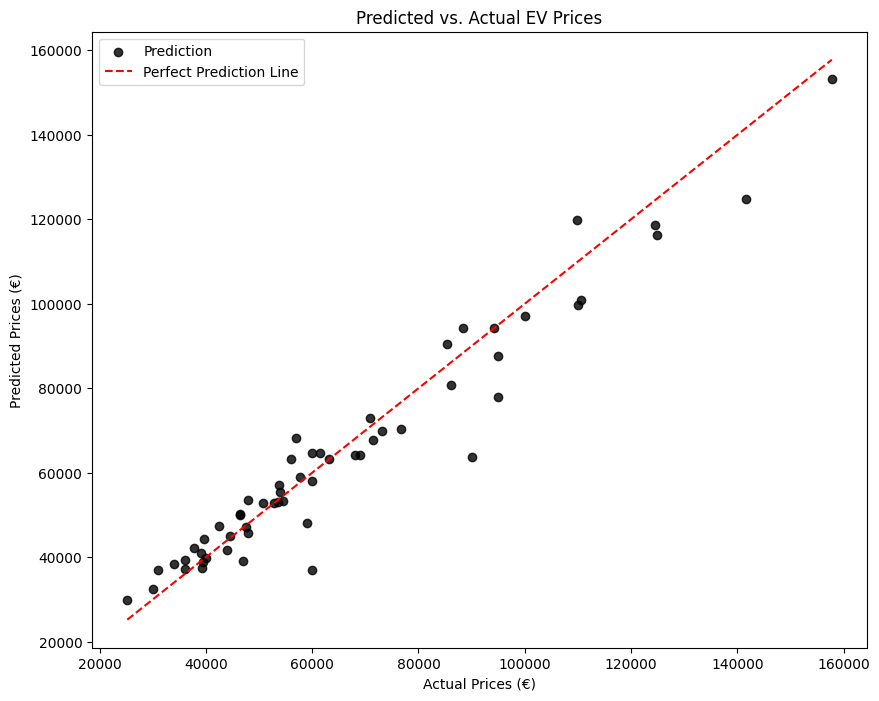

In [ ]:
# Plotting Predicted vs actual EV prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.8, color='black', label="Prediction")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Perfect Prediction Line")
plt.xlabel("Actual Prices (€)")
plt.ylabel("Predicted Prices (€)")
plt.title("Predicted vs. Actual EV Prices")
plt.legend()
plt.show()


### **📌 Final Discussion on the Machine Learning Pipeline**

The following section combines a summary about strengths with limitations and business implications alongside recommendations and an explanation of model explainability.

#### ✅ Strengths of the Model & Pipeline

- High Predictive Accuracy: The n_neighbors value set to 3 in the finalized KNN model demonstrated 94% R² Score which represents 94% variance explanation in electric vehicle pricing.
- Low Prediction Error: Mean Absolute Error shows a value of €5,261 which represents an accurate estimation for the price prediction.
- Hyperparameter Optimization:  Adjustments of n_neighbors, results to a significant drop in RMSE from 9030 down to 7427. 
- The enhanced model interpretability resulted from applying two important features called Price_per_kWh and Power_to_Weight Ratio.

#### ❌ Limitations of the Model

- Limited Dataset Size: The dataset has a small number of 309 Electrical vehicles. This should be extended to improve the generalization.
- KNN Can Be Slow on Large Datasets: Since KNN finds the "nearest neighbors" it can be not efficient enough as the data size grows. Gradient boosting may be better for very large datasets.
- No External Market Factors: The model analyzes only batteries size and range and not real world market requests.

#### 🔹 Implications for the Business Problem

EVision’s pricing strategy benefits from this model through the following applications:

- EVision can determine competitive rates through technical specifications data instead of following manual market research methods.
- EVision needs to pay attention to battery capacity sizes and quick charging speeds when engineering new EVs because these characteristics drive EV prices in the market.
- The model enables EVision to detect vehicle prices that are higher or lower than market value so the company can strategically reposition its prices.

#### ✔ Data-Driven Recommendations

*EVision should focus on the following actions according to model predictions:*

- The area of battery capacity and range needs to be prioritized since it strongly affects price levels which allows for higher charging rates.
- High-value lies in maximum fast-charging speeds since increased speed directly links to market rates.
- Britannica EVision needs to include information about market competitor pricing and government subsidies when developing their forecasting capabilities.
- Before market release KNN can be implemented by EVison to estimate actual prices of new EVs.
- A better prediction accuracy requires augmented data collection through real-time pricing fluctuations together with customer preferences data.

#### ❗️ Most Informative Features

*Following both correlation analysis and model assessment the main effective elements are:*

- Strongest Predictors of Price: Battery Capacity (kWh) (Correlation = 0.64) – Larger battery = higher price.
- The EVs that maintain higher speed capabilities typically have corresponding higher price points (Top Speed km/h has 0.73 correlation value).
- The range distance (km) possesses a direct relationship (0.55) with price elevation.
- Fast Charging Speed (km/h) shows a correlation rate of 0.53 with price levels due to its ability to demand higher rates.
- AWD stands as the most costly drive type compared to FWD and RWD.

#### ❓ Is the Model Explainable

*Yes!*

- KNN reveals its interpretations naturally because it compares the specifications of target vehicles to those of comparable vehicles.
- Internal assumptions built into KNN assist business analysts to understand which specifications drive pricing directions.
- The model finds similar EVs in the market before producing a price estimate through this approach which remains approachable for users.
- The KNN algorithm lacks a capability to explicitly show feature importance that tree-based models including Random Forest produce. The model requires either a Decision Tree analysis or SHAP analysis for understanding complex relationships.


## 📌 Conclusion
With an R² score of 0.94 KNN model (n_neighbors = 3) stands as the best model to predict EV prices. Optimization of pricing strategies combined with setting competitive prices and maximizing profitability is possible through this model for EVision. Enhanced model performance can be achieved by adding external market data and increasing data size.

